In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Creating a random Data Set

In [5]:
N=500
X=np.random.random([N,2])

In [41]:
X

array([[0.13698882, 0.24037979],
       [0.67459911, 0.55674275],
       [0.97209573, 0.71208409],
       [0.47713383, 0.08990652],
       [0.96343472, 0.42101669],
       [0.2712799 , 0.45668456],
       [0.92366606, 0.63402623],
       [0.75914116, 0.65706722],
       [0.03673354, 0.58770938],
       [0.28664962, 0.60756422],
       [0.32808501, 0.21740052],
       [0.44140912, 0.09971422],
       [0.91501723, 0.03999046],
       [0.44742383, 0.20162897],
       [0.49741948, 0.10912042],
       [0.82861122, 0.74845653],
       [0.58656969, 0.46439682],
       [0.4302379 , 0.52859469],
       [0.33044864, 0.5136843 ],
       [0.73446482, 0.51185827],
       [0.52397606, 0.42109042],
       [0.5383173 , 0.19822573],
       [0.15208926, 0.58517215],
       [0.22901252, 0.95351754],
       [0.46078122, 0.88154722],
       [0.32085215, 0.74292519],
       [0.71337516, 0.69445219],
       [0.42108134, 0.77637077],
       [0.22258099, 0.71229766],
       [0.95250132, 0.68713105],
       [0.

### Vizualizing data set 

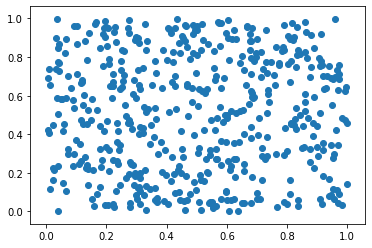

In [6]:
plt.scatter(X[:,0],X[:,1])

### Clearly, the dataset is random, and we do not know how many clusters should it have. Therefore, we must use some sort of method which helps us to choose the number of clusters in Kmeans clustering.In this case we will choose the Elbow Method, and Silhouette Coefficient Method:

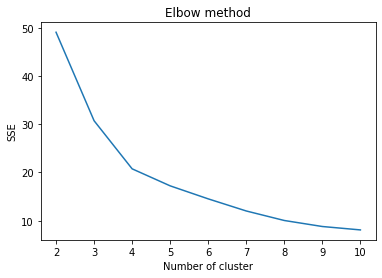

In [12]:
sse={}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    #X["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Elbow method")
plt.show()

### From the Elbow method, it can be observed that the number of clusters should be 4

### Now to use Silhouette Coefficient Method

In [13]:
k={}
for i in range(2,11):
    kmeans = KMeans(n_clusters=i).fit(X)
    label1 = kmeans.labels_
    sil_coeff = silhouette_score(X,label1,metric='euclidean')
    k[i]=sil_coeff

kmax=max(k.items(), key=lambda x : x[1])
print("The number of clusters based on the Silhouette coefficient is",kmax[0],"with a value of",kmax[1])

The number of clusters based on the Silhouette coefficient is 3 with a value of 0.40037118787796994


### Just to make sure, we will vizualize the Sillhouette coefficient method

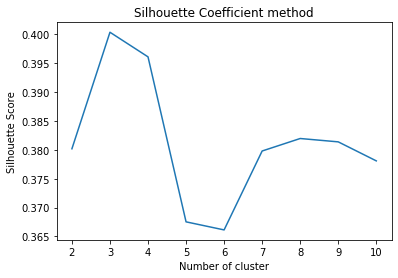

In [14]:
plt.figure()
plt.plot(list(k.keys()), list(k.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Coefficient method")
plt.show()

## Therefore, from both the Elbow and Sillhouette criterion, the number of cluster said data should have is 4.

In [15]:
#Notice that these are the#  clusters obtained from both critiria
kmeansTrue = KMeans(n_clusters=4, max_iter=1000).fit(X)
#clusters centers
print(kmeansTrue.cluster_centers_)

[[0.26679843 0.77550631]
 [0.71899134 0.24131163]
 [0.75296703 0.75196307]
 [0.25370807 0.24033083]]


### Creating image that has 2 subplots. The first one is the cluster data, while the second one the regular data 

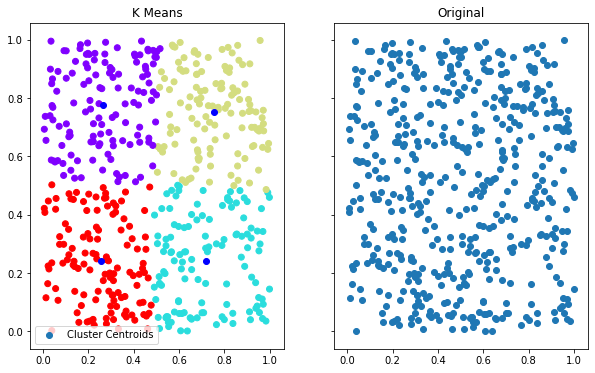

In [20]:
g, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(X[:,0],X[:,1],c=kmeansTrue.labels_,cmap='rainbow')
for i in range(0,4):
    ax1.scatter(kmeansTrue.cluster_centers_[i,0],kmeansTrue.cluster_centers_[i,1],c="b",marker='o')
ax1.legend(["Cluster Centroids"])
ax2.set_title("Original")
ax2.scatter(X[:,0],X[:,1])

### Therefore, we have succesfully applied k means clustering to a data set.

In [19]:
kmeansTrue.labels_

array([3, 2, 2, 3, 1, 3, 2, 2, 0, 0, 3, 3, 1, 3, 1, 2, 1, 0, 0, 2, 1, 1,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 3, 1, 2, 2, 0, 3, 1, 2, 0,
       1, 1, 3, 0, 1, 1, 1, 2, 2, 3, 3, 3, 3, 2, 0, 3, 3, 3, 1, 1, 0, 0,
       2, 3, 3, 1, 3, 0, 3, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 1, 1, 2, 2,
       3, 1, 3, 1, 2, 0, 3, 1, 0, 0, 3, 0, 3, 1, 1, 0, 3, 1, 2, 1, 2, 3,
       2, 0, 3, 3, 0, 2, 1, 2, 1, 0, 2, 1, 3, 2, 2, 3, 2, 2, 3, 2, 1, 0,
       2, 0, 2, 3, 1, 3, 2, 3, 0, 1, 3, 1, 2, 1, 2, 2, 3, 1, 0, 0, 0, 0,
       2, 0, 3, 1, 1, 2, 3, 2, 1, 2, 2, 3, 3, 2, 0, 1, 2, 2, 3, 0, 0, 0,
       3, 1, 1, 1, 2, 2, 2, 1, 3, 0, 2, 0, 1, 0, 2, 0, 1, 2, 2, 3, 2, 1,
       1, 1, 2, 0, 1, 1, 2, 1, 1, 3, 3, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2,
       3, 1, 2, 1, 3, 1, 0, 1, 2, 3, 2, 0, 2, 1, 3, 3, 0, 3, 2, 1, 2, 3,
       3, 3, 0, 3, 2, 2, 2, 2, 3, 2, 1, 0, 2, 0, 0, 3, 0, 1, 0, 0, 2, 3,
       3, 1, 3, 1, 1, 0, 2, 1, 1, 2, 1, 1, 3, 2, 1, 1, 0, 3, 3, 0, 2, 0,
       1, 2, 3, 0, 2, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3,

### Count how many points belong to cluster 1, 2, 3, 4

In [30]:
clusters=np.unique(kmeansTrue.labels_,return_counts=True)

In [35]:
clusters

(array([0, 1, 2, 3]), array([129, 122, 124, 125], dtype=int64))

### Therefore, from the traning data, there are 129 points in cluster 1, 122 points in cluster 2, 124 points in cluster 3, and finally 125 points in cluster 4.

## Testing to see if the model is correct with a new test data

In [46]:
sample_test=np.array([0.1,0.8])
#reshaping my sata set to a 2D array
second_test=sample_test.reshape(1, -1)

#### Predicting a single value of 0.1,0.8, to see if the model does label said point correctly.

In [47]:
kmeansTrue.predict(second_test)

array([0])

### The model works correctly.